# Тема проекта "Выявление закономерностей, определяющих успешность компьютерных игр"


# **Описание проекта**
*Заказчик исследования* - интернет-магазин "Ачивка".<br>
Необходимо изучить исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах, доступные из открытых источников, а также выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
В наборе данных имеется аббревиатура ESRB (Entertainment Software Rating Board) – это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<br>
Данные представлены до 2016 года.

# Цели и задачи проекта

**Цели проекта:**<br>
Получение первичных практических навыков и формирование компетенций в сфере профессиональной деятельности, необходимых для проведения самостоятельной научно-исследовательской работы, а также изучение применяемых в конкретной предметной области подходов, методов и средств решения проблем с использованием современных информационных технологий.
<br><br>
**Задачи проекта:**<br>
- Изучить исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах;<br>
- Установить закономерности, определяющие успешность игры;<br>

# **Содержание проекта**

**1. Загрузка файла с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1. Загрузка файла](#загрузка_файла_задание)<br>

**2. Предобработка данных**<br>
<a id='предобработка_данных'></a>
[Шаг 2. Предобработка данных](#предобработка_данных_задание)<br>

<a id='2.1'></a>
[2.1. Переименование столбца, изменение логики порядка столбцов в датафрейме](#2.1_задание)<br>
<a id='2.2'></a>
[2.2. Проверка на редкие и выбивающиеся значения](#2.2_задание)<br>
<a id='2.3'></a>
[2.3. Проверка типов данных](#2.3_задание)<br>
<a id='2.4'></a>
[2.4. Изучение пропусков в датафрейме](#2.4_задание)<br>
<a id='2.5'></a>
[2.5. Изучение дубликатов в датафрейме](#2.5_задание)<br>
<a id='2.6'></a>
[2.6. Изучение категориальных значений](#2.6_задание)<br>
<a id='2.7'></a>
[2.7. Проверка количественных значений](#2.7_задание)<br>
<a id='2.8'></a>
[2.8. Добавление новых столбцов](#2.8_задание)<br>

**3. Исследовательский анализ данных**<br>
<a id='исследовательский_анализ'></a>
[Шаг 3. Исследовательский анализ](#исследовательский_анализ_задание)<br>

**4. ...**<br>
<a id='...'></a>
[Шаг 4. ...](#..._задание)<br>

.......

**5. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 5. Общий вывод](#общий_вывод_задание)

***

Шпаргалка по анализу данных в Pandas:<br>
https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/ <br>
https://habr.com/ru/companies/ruvds/articles/494720/

***

# 1. Загрузка файла с данными и изучение общей информации
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

**1.1.** Импорт библиотек.

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import matplotlib as mpl
import sklearn
import tqdm
import time

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import(
    mean_squared_error,
    r2_score
)

Сброс ограничений на количество выводимых столбцов.

In [101]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [102]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**1.2.** Загрузка файла с данными.

In [103]:
data = pd.read_csv('01_games.csv')

**1.3.** Изучение общей информации о датафрейме, структуры данных.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16700 non-null  object 
 1   Platform         16702 non-null  object 
 2   Year_of_Release  16433 non-null  float64
 3   Genre            16700 non-null  object 
 4   NA_sales         16702 non-null  float64
 5   EU_sales         16702 non-null  float64
 6   JP_sales         16702 non-null  float64
 7   Other_sales      16702 non-null  float64
 8   Critic_Score     8130 non-null   float64
 9   User_Score       10007 non-null  object 
 10  Rating           9942 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.4.** Знакомство с данными, вывод первых десяти строк датафрейма.

In [105]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**1.5.** Знакомство с данными, вывод последних десяти строк датафрейма.

In [106]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16692,15 Days,PC,"2,009.00",Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16693,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16694,Aiyoku no Eustia,PSV,"2,014.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16695,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16696,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16697,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16698,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16699,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16700,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16701,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


**1.6.** Знакомство с данными, вывод случайной выборки из датафрейма.

In [107]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1563,Football Manager 2011,PC,"2,010.00",Sports,0.00,1.01,0.00,0.25,85.00,8.4,E
8114,de Blob 2,Wii,"2,011.00",Platform,0.11,0.06,0.00,0.02,79.00,8.1,E10+
3833,Mission: Impossible,PS,"1,999.00",Action,0.29,0.20,0.00,0.03,NaN,NaN,NaN
9490,Barbie and the Three Musketeers,DS,"2,009.00",Adventure,0.12,0.00,0.00,0.01,NaN,tbd,E
5488,Battle Dodge Ball,SNES,"1,991.00",Sports,0.00,0.00,0.33,0.00,NaN,NaN,NaN
2225,The LEGO Movie Videogame,PS3,"2,014.00",Action,0.33,0.43,0.02,0.15,80.00,6.8,E10+
10245,Transformers: Beast Wars Transmetals,PS,"2,000.00",Fighting,0.06,0.04,0.00,0.01,NaN,NaN,NaN
7112,TNA iMPACT!,PS2,"2,008.00",Fighting,0.10,0.00,0.00,0.12,NaN,NaN,NaN
3159,Lost Planet: Extreme Condition,PS3,"2,008.00",Shooter,0.31,0.17,0.07,0.08,67.00,7,T
9758,Atelier Sophie: The Alchemist of the Mysteriou...,PS4,"2,015.00",Role-Playing,0.03,0.02,0.06,0.01,75.00,8.1,NaN


**1.7.** Знакомство с атрибутами датафрейма.

In [108]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [109]:
data.shape

(16702, 11)

In [110]:
data.index

RangeIndex(start=0, stop=16702, step=1)

In [111]:
missing_values = data.isnull().sum()
missing_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8572
User_Score         6695
Rating             6760
dtype: int64

**Предварительный вывод по данным**

Согласно документации, датасет **01_games** содержит данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.


* **Name** - Name – название игры
* **Platform** – платформа
* **Year_of_Release** – год выпуска
* **Genre** – жанр игры
* **NA_sales** – продажи в Северной Америке (миллионы долларов)
* **EU_sales** – продажи в Европе (миллионы долларов)
* **JP_sales** – продажи в Японии (миллионы долларов)
* **Other_sales** – продажи в других странах (миллионы долларов)
* **Critic_Score** – оценка критиков (максимум 100)
* **User_Score** – оценка пользователей (максимум 10)
* **Rating** – рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



ESRB использует следующие категории рейтингов для классификации видеоигр:

1. "EC" (Early Childhood) - Раннее детство: Игры, предназначенные для детей младшего возраста (от 3 лет и старше).

2. "E" (Everyone) - Для всех: Игры, которые подходят для всех возрастов (от 6 лет и старше). Могут содержать некоторое насилие, мягкий язык и минимальную степень агрессии.

3. "E10+" (Everyone 10 and older) - Для всех от 10 лет и старше: Игры, рекомендуемые для детей от 10 лет и старше. Могут содержать более интенсивное насилие, мягкое использование нецензурной лексики и некоторые темы, которые могут не подходить для младших детей.

4. "T" (Teen) - Подросткам: Игры, предназначенные для подростков (от 13 лет и старше). Могут содержать насилие, сексуальные сцены, нецензурную лексику и более сложные темы.

5. "M" (Mature) - Для взрослых: Игры, рекомендуемые для взрослых (от 17 лет и старше). Могут содержать насилие высокой интенсивности, кровь и жестокость, сексуальные сцены и язык, а также содержать контент, предназначенный для более зрелой аудитории.

6. "AO" (Adults Only) - Только для взрослых: Игры, предназначенные только для взрослых (18+). Могут содержать сексуальный контент, насилие и крайнюю жестокость.

7. "RP" (Rating Pending) - Рейтинг в ожидании: Это временный рейтинг, присваиваемый играм, которые находятся в процессе обзора и ожидают окончательной классификации.


1. В датафрейме **16702 записи, 11 столбцов**
2. В Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating столбцах имеются **пропущенные значения**.
3. Присутствует нарушение стиля заголовков во всех столбцах, следует изменить регистр.
4. Для ряда столбцов видится возможным изменение типа данных для снижения нагрузки и удобства визуализации данных (отсутствия дробных частей в лейблах/подписях).
5. В столбце Year_of_Release следует выделить год в формате datetime
6. Во всех столбцах возможны дубликаты

# 2. Предобработка данных
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

## Шаг 2.1. Переименование столбцов, изменение логики порядка столбцов в датафрейме
<a id='2.1_задание'></a>
[К содержанию](#2.1)

Убедитесь, что в заголовках столбцов нет лишних пробелов, нарушения "змеиного регистра".

In [112]:
# Проверка наличия лишних пробелов в заголовках столбцов
columns_with_extra_spaces = data.columns[data.columns.str.contains('\s')]

# Вывод результатов
if len(columns_with_extra_spaces) > 0:
    print("Найдены столбцы с лишними пробелами в заголовках:")
    for column in columns_with_extra_spaces:
        print(f"- '{column.strip()}'")
else:
    print("В заголовках столбцов нет лишних пробелов.")

В заголовках столбцов нет лишних пробелов.


Выполните предобработку данных в датафрейме - приведение строчных значений к одному (нижнему) регистру.

In [113]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E


In [114]:
columns_to_replace = [
    'name',
    'platform',
    'genre',
    'rating'
]

In [115]:
from tables.table import Column
for column in columns_to_replace:
  data[column] = data[column].str.lower()

In [116]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1970,monster rancher 2,ps,"1,998.00",simulation,0.19,0.13,0.66,0.07,83.00,NaN,e
7780,aliens versus predator: extinction,ps2,"2,003.00",strategy,0.09,0.07,0.00,0.02,66.00,8.4,t
16289,duel love: koisuru otome wa shouri no megami,ds,"2,008.00",adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12631,raw danger! (jp sales),ps2,"2,006.00",action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14912,my doitall,ds,"2,009.00",misc,0.02,0.00,0.00,0.00,60.00,tbd,e
6378,battle arena toshinden 3,ps,"1,996.00",fighting,0.06,0.04,0.14,0.02,NaN,NaN,NaN
14149,tour de france 2014,ps4,"2,014.00",sports,0.00,0.03,0.00,0.00,53.00,5.1,e
2976,fifa soccer 06,xb,"2,005.00",sports,0.29,0.38,0.00,0.01,80.00,7.5,e
1349,rayman raving rabbids,wii,"2,006.00",misc,1.22,0.06,0.02,0.11,76.00,7.9,e
6525,bratz ponyz 2,ds,"2,008.00",adventure,0.24,0.00,0.00,0.02,NaN,tbd,e


***

#### Шаг 2.2. Проверка на редкие и выбивающиеся значения
<a id='2.2_задание'></a>
[К содержанию](#2.2)

Используя методы unique(), value_counts(), функцию sort_values() попробуйте выявить в датасете редкие и выбивающиеся значения. Предположите, почему эти значение могли появиться.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16700 non-null  object 
 1   platform         16702 non-null  object 
 2   year_of_release  16433 non-null  float64
 3   genre            16700 non-null  object 
 4   na_sales         16702 non-null  float64
 5   eu_sales         16702 non-null  float64
 6   jp_sales         16702 non-null  float64
 7   other_sales      16702 non-null  float64
 8   critic_score     8130 non-null   float64
 9   user_score       10007 non-null  object 
 10  rating           9942 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим значения в столбце **name**

In [118]:
unique_values = data['name'].unique().tolist()
unique_values

['wii sports',
 'super mario bros.',
 'mario kart wii',
 'wii sports resort',
 'pokemon red/pokemon blue',
 'tetris',
 'new super mario bros.',
 'wii play',
 'new super mario bros. wii',
 'duck hunt',
 'nintendogs',
 'mario kart ds',
 'pokemon gold/pokemon silver',
 'wii fit',
 'kinect adventures!',
 'wii fit plus',
 'grand theft auto v',
 'grand theft auto: san andreas',
 'super mario world',
 'brain age: train your brain in minutes a day',
 'pokemon diamond/pokemon pearl',
 'super mario land',
 'super mario bros. 3',
 'grand theft auto: vice city',
 'pokemon ruby/pokemon sapphire',
 'brain age 2: more training in minutes a day',
 'pokemon black/pokemon white',
 'gran turismo 3: a-spec',
 'call of duty: modern warfare 3',
 'pokémon yellow: special pikachu edition',
 'call of duty: black ops 3',
 'call of duty: black ops',
 'pokemon x/pokemon y',
 'call of duty: black ops ii',
 'call of duty: modern warfare 2',
 'grand theft auto iii',
 'super smash bros. brawl',
 'mario kart 7',
 'ani



> В столбце 'name' уникальных и выбивающихся значений не обнаружено.



Проверим значения в столбце **platform**

In [119]:
unique_values = data['platform'].unique().tolist()
unique_values

['wii',
 'nes',
 'gb',
 'ds',
 'x360',
 'ps3',
 'ps2',
 'snes',
 'gba',
 'ps4',
 '3ds',
 'n64',
 'ps',
 'xb',
 'pc',
 '2600',
 'psp',
 'xone',
 'wiiu',
 'gc',
 'gen',
 'dc',
 'psv',
 'sat',
 'scd',
 'ws',
 'ng',
 'tg16',
 '3do',
 'gg',
 'pcfx']



> В столбце 'platform' уникальных и выбивающихся значений не обнаружено.



Проверим значения в столбце **year_of_release**

In [120]:
unique_values = data['year_of_release'].unique().tolist()
unique_values

[2006.0,
 1985.0,
 2008.0,
 2009.0,
 1996.0,
 1989.0,
 1984.0,
 2005.0,
 1999.0,
 2007.0,
 2010.0,
 2013.0,
 2004.0,
 1990.0,
 1988.0,
 2002.0,
 2001.0,
 2011.0,
 1998.0,
 2015.0,
 2012.0,
 2014.0,
 1992.0,
 1997.0,
 1993.0,
 1982.0,
 2016.0,
 2003.0,
 1986.0,
 2000.0,
 nan,
 1994.0,
 1995.0,
 1991.0,
 1981.0,
 1987.0,
 1980.0,
 1983.0]



> В столбце 'year_of_release' уникальных и выбивающихся значений не обнаружено.



Проверим значения в столбце **genre**

In [121]:
unique_values = data['genre'].unique().tolist()
unique_values

['sports',
 'platform',
 'racing',
 'role-playing',
 'puzzle',
 'misc',
 'shooter',
 'simulation',
 'action',
 'fighting',
 'adventure',
 'strategy',
 nan]



> В столбце 'genre' уникальных и выбивающихся значений не обнаружено.



Проверим значения в столбце **user_score**

In [122]:
unique_values = data['user_score'].unique().tolist()
unique_values

['8',
 nan,
 '8.3',
 '8.5',
 '6.6',
 '8.4',
 '8.6',
 '7.7',
 '6.3',
 '7.4',
 '8.2',
 '9',
 '7.9',
 '8.1',
 '8.7',
 '7.1',
 '3.4',
 '5.3',
 '4.8',
 '3.2',
 '8.9',
 '6.4',
 '7.8',
 '7.5',
 '2.6',
 '7.2',
 '9.2',
 '7',
 '4.3',
 '7.6',
 '5.7',
 '5',
 '9.1',
 '6.5',
 '7.3',
 'tbd',
 '8.8',
 '6.9',
 '9.4',
 '6.8',
 '6.1',
 '6.7',
 '5.4',
 '4',
 '4.9',
 '4.5',
 '9.3',
 '6.2',
 '4.2',
 '6',
 '3.7',
 '4.1',
 '5.8',
 '5.6',
 '5.5',
 '4.4',
 '4.6',
 '5.9',
 '3.9',
 '3.1',
 '2.9',
 '5.2',
 '3.3',
 '4.7',
 '5.1',
 '3.5',
 '2.5',
 '1.9',
 '3',
 '2.7',
 '2.2',
 '2',
 '9.5',
 '2.1',
 '3.6',
 '2.8',
 '1.8',
 '3.8',
 '0',
 '1.6',
 '9.6',
 '2.4',
 '1.7',
 '1.1',
 '0.3',
 '1.5',
 '0.7',
 '1.2',
 '2.3',
 '0.5',
 '1.3',
 '0.2',
 '0.6',
 '1.4',
 '0.9',
 '1',
 '9.7']

> В процессе обработки данных в столбце user_score были. обнаружены строковые значения 'tbd', которые означают:<br>
> TBD в оценках рейтинга игры обычно означает "To Be Determined" (подлежит определению) или "To Be Decided" (будет определено). Это используется в случаях, когда оценка или рейтинг игры еще не были окончательно установлены или объявлены официально.<br>
> В нашем случае отсутствие рейтинга на данный момент приравнивается к пустому значению, поэтому можно считать значение 'tbd' - пустым значением и временно заменить его на NaN.



In [123]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Проверим значения столбца **'rating'**

In [124]:
data['rating'].sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', nan], dtype=object)

In [125]:
data[data['rating'] == 'k-a']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
645,theme hospital,pc,"1,997.00",strategy,2.30,0.10,0.00,0.00,NaN,9,k-a
892,parappa the rapper,ps,"1,996.00",misc,0.26,0.16,1.46,0.03,92.00,7.4,k-a
16668,worms 2,pc,"1,997.00",strategy,0.00,0.01,0.00,0.00,NaN,8.1,k-a


В столбце 'rating' были найдены строки с неизвестным значением 'k-a', т.к. таких строк всего 3, найдем игры на официальном сайте ESRB и выставим рейтинг вручную.

In [126]:
data.loc[645]

name               theme hospital
platform                       pc
year_of_release          1,997.00
genre                    strategy
na_sales                     2.30
eu_sales                     0.10
jp_sales                     0.00
other_sales                  0.00
critic_score                  NaN
user_score                      9
rating                        k-a
Name: 645, dtype: object

In [127]:
data.at[645, 'rating'] = 'e'

In [128]:
data.loc[645]

name               theme hospital
platform                       pc
year_of_release          1,997.00
genre                    strategy
na_sales                     2.30
eu_sales                     0.10
jp_sales                     0.00
other_sales                  0.00
critic_score                  NaN
user_score                      9
rating                          e
Name: 645, dtype: object

In [129]:
data.loc[892]

name               parappa the rapper
platform                           ps
year_of_release              1,996.00
genre                            misc
na_sales                         0.26
eu_sales                         0.16
jp_sales                         1.46
other_sales                      0.03
critic_score                    92.00
user_score                        7.4
rating                            k-a
Name: 892, dtype: object

In [130]:
data.at[892, 'rating'] = 'e'

In [131]:
data.loc[892]

name               parappa the rapper
platform                           ps
year_of_release              1,996.00
genre                            misc
na_sales                         0.26
eu_sales                         0.16
jp_sales                         1.46
other_sales                      0.03
critic_score                    92.00
user_score                        7.4
rating                              e
Name: 892, dtype: object

In [132]:
data.loc[16668]

name                worms 2
platform                 pc
year_of_release    1,997.00
genre              strategy
na_sales               0.00
eu_sales               0.01
jp_sales               0.00
other_sales            0.00
critic_score            NaN
user_score              8.1
rating                  k-a
Name: 16668, dtype: object

In [133]:
data.at[16668, 'rating'] = 'e'

In [134]:
data.loc[16668]

name                worms 2
platform                 pc
year_of_release    1,997.00
genre              strategy
na_sales               0.00
eu_sales               0.01
jp_sales               0.00
other_sales            0.00
critic_score            NaN
user_score              8.1
rating                    e
Name: 16668, dtype: object

In [135]:
data[data['rating'] == 'k-a']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Разделим столбец с оценками критиков на 10, для того, чтобы их можно было легко сравнить с оценками пользователей.

In [136]:
data['critic_score'] = data['critic_score'] / 10

In [137]:
data.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9104,active life explorer,wii,"2,010.00",sports,0.13,0.00,0.00,0.01,NaN,NaN,e
9583,soccer tsuku: pro soccer club o tsukurou!,ps3,"2,013.00",sports,0.00,0.00,0.13,0.00,NaN,NaN,NaN
11350,the golf club,ps4,"2,014.00",sports,0.05,0.02,0.00,0.01,6.60,6.3,e


### Предварительный вывод по шагу 2.2

В результате поиска выбивающихся значений были получены результаты:


* В столбцах 'name', 'platform', 'year_of_release', 'genre', после детального анализа, уникальных и выбивающихся значений не было обнаружено.
* В столбце 'user_score' было выявлено и устранено выбивающееся значение 'tbd'.
* В столбце 'rating' было выявлено выбивающееся значение 'k-a', которое было заменено на реальное.
* Представление данных столбца 'critic_score' было изменено для удобства работы с данными.  



## Шаг 2.3. Проверка типов данных
<a id='2.3_задание'></a>
[К содержанию](#2.3)

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16700 non-null  object 
 1   platform         16702 non-null  object 
 2   year_of_release  16433 non-null  float64
 3   genre            16700 non-null  object 
 4   na_sales         16702 non-null  float64
 5   eu_sales         16702 non-null  float64
 6   jp_sales         16702 non-null  float64
 7   other_sales      16702 non-null  float64
 8   critic_score     8130 non-null   float64
 9   user_score       7583 non-null   object 
 10  rating           9942 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для последующей обработки данных, требуется заменить тип данных в столбцах: **'year_of_release**', **'user_score'**.

Изменение типа данных столбца **'year_of_release'** с float на int

In [139]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer', errors='coerce')

Изменение типа данных столбца **'user_score'** с object на float

In [140]:
data['user_score'] = data['user_score'].apply(float)

### Предварительный вывод по шагу 2.3

В шаге 2.3 проекта были выполнены следующие действия:


* Тип данных столбца 'year_of_release' был изменен с float на int.
* Тип данных столбца 'user_score' был изменен с object на float.

***

## Шаг 2.4. Изучение пропусков в датафрейме
<a id='2.4_задание'></a>
[К содержанию](#2.4)

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**a)** Анализ количества **пропусков** в столбцах.

In [141]:
# Анализ количества пропусков в столбцах
missing_values = data.isna().sum()
missing_values

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8572
user_score         9119
rating             6760
dtype: int64

**b)** Расчет **количества пропущенных значений** в каждом столбце, **в процентах**.

In [142]:
# Расчет количества пропущенных значений в каждом столбце в процентах
missing_values_percent = (data.isna().sum() / len(data)) * 100
missing_values_percent

name               0.01
platform           0.00
year_of_release    1.61
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.32
user_score        54.60
rating            40.47
dtype: float64

<Axes: >

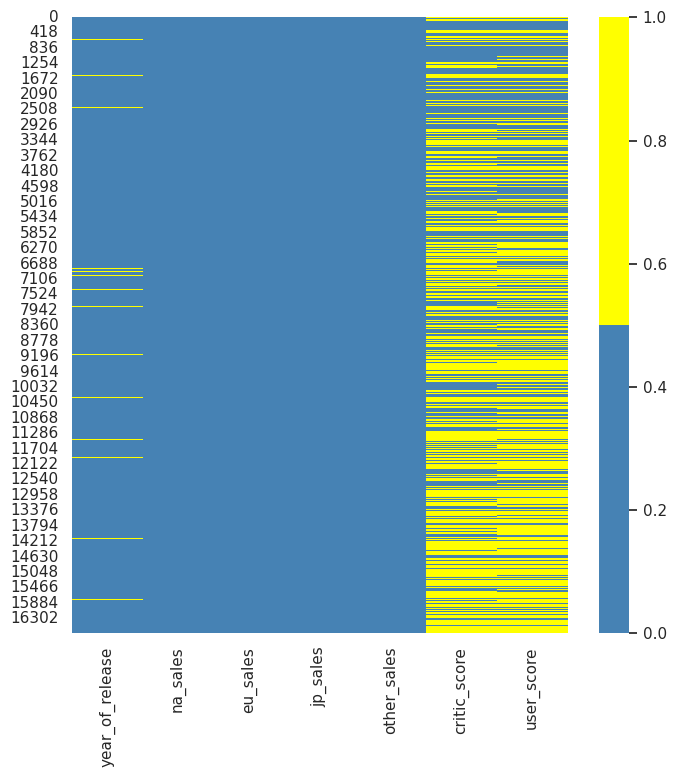

In [143]:
colours = ['#4682B4', '#ffff00']
sns.set(rc = {'figure.figsize':(8,8)})

sns.heatmap(
            data[data.select_dtypes(include=[np.number]).columns.values].isnull(),
            cmap=sns.color_palette(colours)
)

Предварительный вывод



* В столбцах 'name', 'genre' пустых значений крайне мало, поэтому упущенные данные можно будет либо восстановить, либо удалить из датафрейма.
* В столбцах  'year_of_release', 'critic_score', 'user_score', 'rating' большое количество пустых значений, которые нужно рассматривать более детально.



**Проработаем каждый столбец по отдельности.**

Проверим строки с пустыми значениями в столбце **'name'**.

In [144]:
data.loc[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
648,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14231,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки не несут никакой информационной ценности и захламляют наш датафрейм. Эти строки следует удалить.

In [145]:
data = data.drop(648)

In [146]:
data = data.drop(14231)

Проверим строки с пустыми значениями в столбце **'platform'**.

In [147]:
data.loc[data['platform'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбце 'platform' отсутствуют пропуски.

Проверим строки с пустыми значениями в столбце **'year_of_release'**.

In [148]:
data.loc[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
172,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,9.40,8.50,e
366,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,8.40,6.40,e
445,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,7.40,7.90,e10+
464,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
598,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16360,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,4.30,NaN,e10+
16392,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,6.90,6.50,t
16435,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,5.90,6.70,m
16445,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строк в которых отсутствует год релиза игры слишком много, поэтому восстановить данные невозможно. Все пропущенные значения нужно заменить на 0. Строки со значением 0 будут означать, что у игры не указан параметр 'year_of_release'.

In [149]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

In [150]:
data.loc[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце 'year_of_release' были устранены.

Проверим пропуски в столбце **'genre'**.

In [151]:
data.loc[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце **'genre'** отсутствуют.

Проверим на наличие пропусков столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'.

In [152]:
data.loc[data['na_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [153]:
data.loc[data['eu_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [154]:
data.loc[data['jp_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [155]:
data.loc[data['other_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' пропуски отсутствуют.

Проверим на наличие пропусков столбцы **'critic_score', 'user_score'**.

In [156]:
data.loc[data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16697,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16698,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16699,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16700,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [157]:
data.loc[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16697,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16698,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16699,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16700,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Т.к. пустых значений в данных столбцах слишком много, восстановить эти данные не получится, поэтому все пустые значения будут заменены на -1, что будет означать, что у игры пока что нет рейтинга.

In [158]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [159]:
data['user_score'] = data['user_score'].fillna(-1)

In [160]:
data.loc[data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [161]:
data.loc[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбцах **'critic_score', 'user_score'** были исключены.

### Предварительный вывод по шагу 2.4

- В столбцах 'name', 'genre' пустые значения были исключены посредством удаления строк.
- В столбцах 'year_of_release', 'critic_score', 'user_score', 'rating' избежать пустых значений невозможно, поэтому они были заменены специальными данными.

***

#### Шаг 2.5. Изучение дубликатов в датафрейме
<a id='2.5_задание'></a>
[К содержанию](#2.5)
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**a)** Поиск **явных дубликатов**.

In [162]:
data.duplicated().any()

False

**b)** Проверка наличия **пустых**/почти пустых **строк**.

In [163]:
data.isna().sum(axis=1) >= (data.shape[1] * 0.5)

0        False
1        False
2        False
3        False
4        False
         ...  
16697    False
16698    False
16699    False
16700    False
16701    False
Length: 16700, dtype: bool

**c)** Поиск **неявных дубликатов** (по столбцам).

In [164]:
data.duplicated(keep=False).any()

False

> **Предварительный вывод по шагу 2.5**

- Явных дубликатов во всем датафрейме нет.
- Пустых/полупустых строк в датафрейме нет.
- Неявных дубликатов нет.

***

## Шаг 2.6. Изучение категориальных значений
<a id='2.6_задание'></a>
[К содержанию](#2.6)
- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Составьте список столбцов с категориальными значениями. Изучение категориальных значений пока НЕ ПРОВОДИТЕ (**шаг 2.6 пропустите**).

**Категориальные значения:**


*   name
*   platform
* genre
* rating



Поиск неявных дубликатов.

Неявные дубликаты возможны в столбцах 'name', 'platform', 'genre', 'rating'. Проверим данные столбцы.

а) Проверим столбец 'name'.

In [165]:
data['name'].sort_values().unique()

array(['.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)', ..., 'zwei!!',
       'zyuden sentai kyoryuger: game de gaburincho!!',
       '¡shin chan flipa en colores!'], dtype=object)

b) Проверим столбец 'platform'.

In [166]:
data['platform'].sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

c) Проверим столбец 'genre'.

In [167]:
data['genre'].sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [168]:
data[data['genre'] == 'platform']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NaN
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.90,8.50,e
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,8.70,8.40,e
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,-1.00,-1.00,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,-1.00,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16342,strider (2014),ps3,2014,platform,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16344,goku makaimura kai,psp,2007,platform,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN
16588,the land before time: into the mysterious beyond,gba,2006,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,NaN
16695,woody woodpecker in crazy castle 5,gba,2002,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,NaN


d) Проверим столбец 'rating'.

Предварительный вывод по шагу 2.6

- Проверил категориальные столбцы 'name', 'platform', 'genre', 'rating' на наличие неявных дубликатов.
- В столбцах 'name', 'platform', 'genre', 'rating' никаких ошибок и лишних символов не обнаружено.

***

## Шаг 2.7. Проверка количественных значений
<a id='2.7_задание'></a>
[К содержанию](#2.7)

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

Составьте список столбцов с количественными значениями. Изучение количественных значений пока НЕ ПРОВОДИТЕ (**шаг 2.7 пропустите**).

**Колличественные значения:**


*   year_of_release
*   na_sales
*   eu_sales
*   jp_sales
*   other_sales
*   critic_score
*   user_score

### Предварительный вывод по шагу 2.7



> Подозрительные данные в столбцах были обработаны в процессе предобработки данных. Повторения во всех колличественных столбцах возможны, поэтому делать такую проверку бессмысленно.



***

#### Шаг 2.8. Добавление новых столбцов
<a id='2.8_задание'></a>
[К содержанию](#2.8)

**2.8.1.** Добавьте столбец, в котором рассчитайте общее количество продаж во всех регионах.

In [169]:
data['summa'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**2.8.2.** Добавьте столбец с категоризацией данных по числовым диапазонам.

In [170]:
bins = [0, 1980, 2006, float('inf')]

labels = ['unknown_year', 'old_games', 'new_games']

data['year_category'] = pd.cut(data['year_of_release'], bins=bins, labels=labels, right=False)


In [171]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category
8283,super robot taisen compact 2 dai-1-bu,ws,2000,strategy,0.00,0.00,0.17,0.00,-1.00,-1.00,NaN,0.17,old_games
14720,kidou senshi v gundam,snes,1994,action,0.00,0.00,0.03,0.00,-1.00,-1.00,NaN,0.03,old_games
5182,mobile suit z-gundam,ps,1997,action,0.00,0.00,0.34,0.02,-1.00,-1.00,NaN,0.36,old_games
5819,touhoku daigaku mirai kagaku gijutsu kyoudou k...,psp,2005,misc,0.00,0.00,0.30,0.00,-1.00,-1.00,NaN,0.30,old_games
4526,midway arcade treasures,xb,2003,misc,0.33,0.08,0.00,0.01,7.40,-1.00,t,0.42,old_games


**2.8.3.** Добавьте столбец, используя функцию для одной строки.

In [172]:
def categorize_age(row):
    critic = row['critic_score']
    user = row['user_score']
    if critic > user:
      return 'critic'
    elif user > critic:
      return 'user'
    else:
      return 'equally'

data['rated_higher'] = data.apply(categorize_age, axis=1)


In [173]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
9506,army men: soldiers of misfortune,wii,2008,shooter,0.12,0.00,0.00,0.01,-1.00,2.50,e,0.13,new_games,user
9415,dengeki bunko fighting climax,psv,2014,fighting,0.04,0.00,0.08,0.01,7.50,8.50,t,0.13,new_games,user
7648,bust-a-move 2 arcade edition,ps,1995,puzzle,0.11,0.07,0.00,0.01,-1.00,-1.00,NaN,0.19,old_games,equally
9161,yogi bear: the video game,ds,2010,action,0.10,0.03,0.00,0.01,-1.00,-1.00,NaN,0.14,new_games,equally
288,star fox 64,n64,1997,shooter,2.78,0.58,0.64,0.04,-1.00,-1.00,NaN,4.04,old_games,equally


> **Вывод к шагу 2 "Предобработка данных"**

Таким образом, в результате предобработки данных<br>
- Было проверено соответствие датафрейма "змеиному регистру". <br>
- Наименования столбцов и весь текст был приведен к нижнему регистру. <br>
- Все столбцы были проверены на пропуски. <br>
- Были удалены некоторые строки с пропусками. <br>
- Были заполнены пустые значения там ге это требовалось. <br>
- Был изменен тип данных в столбцах 'year_of_release', 'critic_score'. <br>
- Был произведен поиск явных и неявных дубликатов. <br>
- Был добавлен столбец с итоговым заработком игры во всех странах. <br>
- Были добавлены два столбца, при помощи категоризации данных по диапазонам и функции одной строки. <br>

***

# 3. Самостоятельная работа по исследовательскому анализу данных
<a id='исследовательский_анализ_задание'></a>
[К содержанию](#исследовательский_анализ)

## 1. Рассчитайте количество выпущенных игр по годам, по платформам.

Количество выпущенных игр по годам

In [174]:
data_pivot_ratings = data.pivot_table(
    index='year_of_release', values='name', aggfunc='count'
)

data_pivot_ratings[1:]

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Количество выпущенных игр по платформам.

In [175]:
data_pivot_ratings = data.pivot_table(
    index='platform', values='name', aggfunc='count'
)

data_pivot_ratings

,name
platform,
2600,133
3do,3
3ds,519
dc,52
ds,2150
gb,97
gba,822
gc,556
gen,27


## 2. Выведите список топ-5 самых продаваемых игр по годам, по платформам, по жанрам.

### Список топ-5 самых продаваемых игр по годам

In [176]:
data_pivot_ratings = data.pivot_table(
    index='year_of_release', values='summa', aggfunc='sum'
)
data_pivot_ratings.sort_values(by='summa', ascending=False).head(5)

,summa
year_of_release,
2008,671.50
2009,658.82
2007,586.52
2010,580.69
2006,517.71


### Список топ-5 самых продаваемых игр по платформам

In [177]:
data_pivot_ratings = data.pivot_table(
    index='platform', values='summa', aggfunc='sum'
)
data_pivot_ratings.sort_values(by='summa', ascending=False).head(5)

,summa
platform,
ps2,"1,255.77"
x360,944.13
ps3,930.29
wii,898.07
ds,797.21


### Список топ-5 самых продаваемых игр по жанрам.

In [178]:
data_pivot_ratings = data.pivot_table(
    index='genre', values='summa', aggfunc='sum'
)
data_pivot_ratings.sort_values(by='summa', ascending=False).head(5)

,summa
genre,
action,"1,744.11"
sports,"1,331.27"
shooter,"1,033.77"
role-playing,919.38
platform,818.47


## 3. Узнайте, на какой платформе было выпущено больше всего игр.

In [179]:
data_pivot_ratings = data.pivot_table(
    index='platform', values='name', aggfunc='count'
)

data_pivot_ratings.sort_values(by='name', ascending=False)[:1]

,name
platform,
ps2,2161


## 4. Определите, игр какого жанра больше всего.

In [180]:
data_pivot_ratings = data.pivot_table(
    index='genre', values='name', aggfunc='count'
)

data_pivot_ratings.sort_values(by='name', ascending=False)[:1]

,name
genre,
action,3368


## 5. Найдите игры с наибольшей и наименьшей оценкой от пользователей.

### Игра с наибольшей оценкой от пользователей

In [181]:
data_pivot_ratings = data.pivot_table(
    index='name', values='user_score', aggfunc='max'
)

data_pivot_ratings.sort_values(by='user_score', ascending=False)[:1]

,user_score
name,
breath of fire iii,9.70


### Игры с наименьшей оценкой от пользователей

In [182]:
data_pivot_ratings = data.pivot_table(
    index='name', values='user_score', aggfunc='max'
)
data_pivot_ratings = data_pivot_ratings.loc[~(data_pivot_ratings['user_score'] == -1)]
data_pivot_ratings.sort_values(by='user_score', ascending=True)[:1]

,user_score
name,
my little pony: pinkie pie's party,0.00


## 6. Найдите игры с наибольшей и наименьшей оценкой от критиков.

### Игры с наивысшей оценкой от критиков

In [183]:
data_pivot_ratings = data.pivot_table(
    index='name', values='critic_score', aggfunc='max'
)

data_pivot_ratings.sort_values(by='critic_score', ascending=False)[:3]

,critic_score
name,
grand theft auto iv,9.80
tony hawk's pro skater 2,9.80
soulcalibur,9.80


### Игры с самой низкой оценкой от критиков

In [184]:
data_pivot_ratings = data.pivot_table(
    index='name', values='critic_score', aggfunc='max'
)
data_pivot_ratings = data_pivot_ratings.loc[~(data_pivot_ratings['critic_score'] == -1)]
data_pivot_ratings.sort_values(by='critic_score', ascending=True)[:3]

,critic_score
name,
anubis ii,1.90
ride to hell,1.90
nickelodeon party blast,1.90


# Исследовательский анализ

**3.1.** Выполните исследование данных в датафрейме с использованием индексации по координатам.

In [185]:
data.loc[10123:10125]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
10123,the fairly odd parents: breakin da rules,xb,2003,platform,0.08,0.02,0.00,0.00,-1.00,-1.00,NaN,0.10,old_games,equally
10124,capcom vs. snk 2 eo,gc,2002,fighting,0.09,0.02,0.00,0.00,6.80,8.90,t,0.11,old_games,user
10125,hot wheels velocity x,gc,2002,racing,0.09,0.02,0.00,0.00,5.50,6.40,e,0.11,old_games,user


**3.2.** Выполните исследование данных в датафрейме с использованием логической индексации (не менее 3ех фильтров).

In [186]:
data[data['year_of_release'] > 1990]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,new_games,equally
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN,31.38,old_games,equally
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.90,8.50,e,29.80,new_games,critic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN,0.01,new_games,equally
16698,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,NaN,0.01,new_games,equally
16699,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN,0.01,new_games,equally
16700,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,NaN,0.01,old_games,equally


In [187]:
data[data['critic_score'] > 6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,new_games,equally
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.90,8.50,e,29.80,new_games,critic
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,8.70,8.40,e,28.32,new_games,critic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16660,mortal kombat: deadly alliance,gba,2002,fighting,0.01,0.00,0.00,0.00,8.10,8.80,m,0.01,old_games,user
16679,metal gear solid v: ground zeroes,pc,2014,action,0.00,0.01,0.00,0.00,8.00,7.60,m,0.01,new_games,critic
16682,planet monsters,gba,2001,action,0.01,0.00,0.00,0.00,6.70,-1.00,e,0.01,old_games,critic
16683,breach,pc,2011,shooter,0.01,0.00,0.00,0.00,6.10,5.80,t,0.01,new_games,critic


In [188]:
data[data['summa'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NaN,40.24,old_games,equally
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,new_games,equally
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN,31.38,old_games,equally
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,9.80,7.50,m,10.50,new_games,critic
58,pokemon firered/pokemon leafgreen,gba,2004,role-playing,4.34,2.65,3.15,0.35,-1.00,-1.00,NaN,10.49,old_games,equally
59,super mario 64,ds,2004,platform,5.01,3.07,1.25,0.97,-1.00,-1.00,NaN,10.30,old_games,equally
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,7.30,2.60,m,10.24,new_games,critic


**3.3.** Выполните исследование данных в датафрейме с использованием сводных таблиц (не менее 3ех сводных с различной структурой). В одной из сводных рассчитайте процентное соотношение.

In [189]:
pivot_table = data.pivot_table(
    values='summa', index='year_of_release', aggfunc='max')
pivot_table[1:]

,summa
year_of_release,
1980,4.31
1981,4.50
1982,7.81
1983,3.20
1984,28.31
1985,40.24
1986,6.50
1987,4.38
1988,17.28


In [190]:
pivot_table = data.pivot_table(
    values='summa', index='genre', aggfunc='sum')
pivot_table

,summa
genre,
action,"1,744.11"
adventure,237.59
fighting,447.53
misc,774.98
platform,818.47
puzzle,242.57
racing,710.41
role-playing,919.38
shooter,"1,033.77"


In [191]:
pivot_table = data.pivot_table(
    values='name', index='platform', aggfunc=lambda x: len(x)/len(data)*100)
pivot_table

,name
platform,
2600,0.80
3do,0.02
3ds,3.11
dc,0.31
ds,12.87
gb,0.58
gba,4.92
gc,3.33
gen,0.16


**3.4.** Выполните исследование данных в датафрейме с использованием методов groupby() и agg() (не менее 3ех сгруппированных таблиц с различной структурой). В одной из таблиц добавьте расчетный столбец.

1. Рассчитаем средний и максимальный объем сборов игр на определенных платформах.

In [192]:
grouped = data.groupby('platform')
pivot_table = grouped['summa'].agg(['mean', 'max'])
pivot_table

,mean,max
platform,,
2600,0.73,7.81
3do,0.03,0.06
3ds,0.48,14.60
dc,0.31,2.41
ds,0.37,29.80
gb,2.57,31.38
gba,0.39,15.84
gc,0.36,7.06
gen,1.05,6.02


2. Выполним группировку по годам и найдем среднее значение оценки пользователей.

In [193]:
grouped = data.groupby('year_of_release')
pivot_table = grouped['user_score'].agg('mean')
pivot_table[1:]

year_of_release
1980   -1.00
1981   -1.00
1982   -1.00
1983   -1.00
1984   -1.00
1985   -0.51
1986   -1.00
1987   -1.00
1988   -0.79
1989   -1.00
1990   -1.00
1991   -1.00
1992   -0.78
1993   -1.00
1994   -0.94
1995   -1.00
1996   -0.71
1997   -0.41
1998   -0.22
1999   -0.16
2000    1.62
2001    3.58
2002    3.81
2003    4.90
2004    4.62
2005    4.28
2006    3.53
2007    3.14
2008    2.68
2009    2.44
2010    1.93
2011    2.36
2012    3.06
2013    3.18
2014    3.29
2015    2.76
2016    2.98
Name: user_score, dtype: float64

3. Выведем среднее и максимальное значение прибыли по каждом году, а также рассчитаем процентное соотношение среднего значения к максимальному.

In [194]:
grouped = data.groupby('year_of_release')
pivot_table = grouped['summa'].agg(['mean', 'max'])
pivot_table['percent'] = pivot_table['mean'] / pivot_table['max'] * 100
pivot_table['count'] = grouped['name'].agg('count')
pivot_table

,mean,max,percent,count
year_of_release,,,,
0,0.37,5.24,7.02,269
1980,1.26,4.31,29.34,9
1981,0.78,4.50,17.24,46
1982,0.80,7.81,10.27,36
1983,0.99,3.20,30.88,17
1984,3.60,28.31,12.70,14
1985,3.85,40.24,9.58,14
1986,1.77,6.50,27.16,21
1987,1.36,4.38,30.96,16


Таким образом,<br>
- На старых играх отсутствуют оценки пользователей.
- Чем больше игр выпускалось в определенном году, тем ниже средняя оценка пользователей на игры в разрезе года.
- Самыми высокооцениваемыми платформами являются 'nes' и 'gb'.

**3.5.**  С помощью сводной таблицы посчитайте **среднюю и медианную сумму сборов** для каждого года.

In [195]:
pivot_table = data.pivot_table(
    values='summa', index='year_of_release', aggfunc=['mean', 'median'])
pivot_table

,mean,median
,summa,summa
year_of_release,,
0,0.37,0.16
1980,1.26,0.77
1981,0.78,0.46
1982,0.80,0.54
1983,0.99,0.77
1984,3.60,1.48
1985,3.85,1.02
1986,1.77,1.36


***

# 4. Графический анализ данных
<a id='..._задание'></a>
[К содержанию](#...)<br><br>

## Задание 1
Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по годам» постройте наиболее подходящий график. Выполните его настройку (подписи осей, легенда, заголовок графика, подписи элементов графика (столбцов и др.) и т.д.).

Для наглядности продублируем сводную таблицу перед построением графика, а также уберем из таблицы игры с неизвестной датой выпуска.

In [196]:
data_pivot_ratings = data.pivot_table(
    index='year_of_release', values='name', aggfunc='count'
)
data_pivot_ratings = data_pivot_ratings.iloc[1:]
data_pivot_ratings

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построение таблицы.

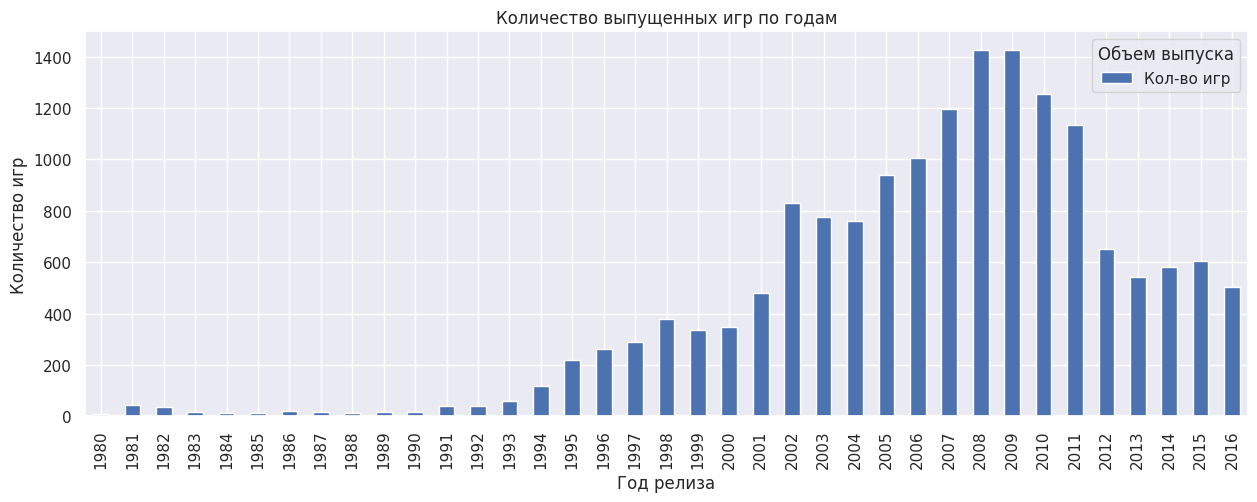

In [197]:
data_pivot_ratings.plot.bar( figsize=(15, 5))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
legend_labels = ['Кол-во игр']
plt.legend(title='Объем выпуска',labels =legend_labels,  loc='upper right')
plt.show()

## Задание 2

Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по платформам» постройте наиболее подходящий график. Выполните его настройку (подписи осей, легенда, заголовок графика, подписи элементов графика (столбцов и др.) и т.д.).

Для наглядности продублируем сводную таблицу перед построением графика, а также уберем из таблицы игры с неизвестной датой выпуска.

In [198]:
data_pivot_ratings = data.pivot_table(
    index='platform', values='name', aggfunc='count'
)
data_pivot_ratings

,name
platform,
2600,133
3do,3
3ds,519
dc,52
ds,2150
gb,97
gba,822
gc,556
gen,27


Построение таблицы.

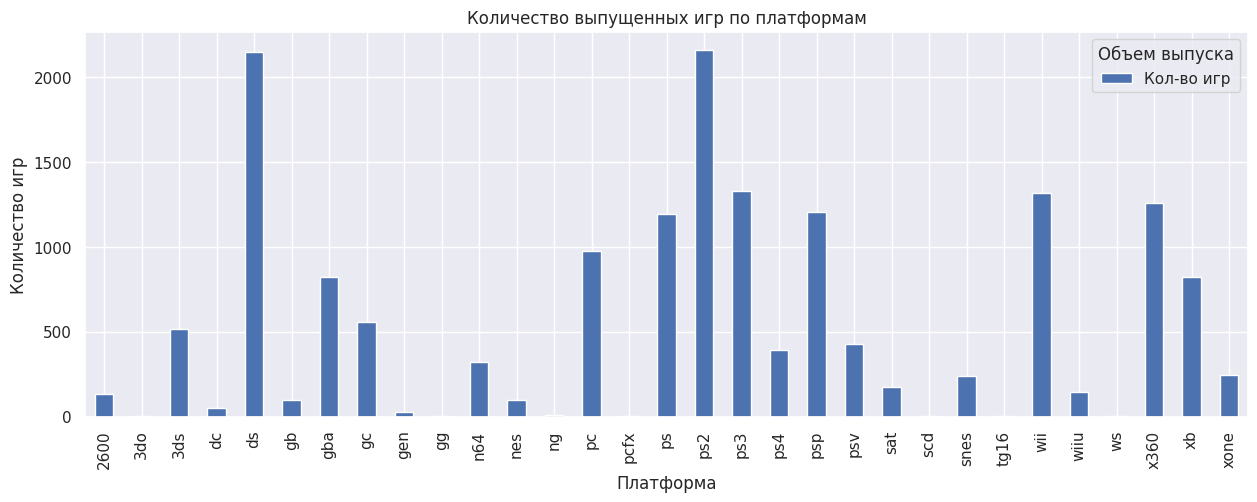

In [199]:
data_pivot_ratings.plot.bar( figsize=(15, 5))
plt.title('Количество выпущенных игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
legend_labels = ['Кол-во игр']
plt.legend(title='Объем выпуска',labels =legend_labels,  loc='upper right')
plt.show()

## Задание 3

Проведем статистический анализ для разных выборок, используя метод query()

1. Попробуем выявить влияние оценок критиков и пользователей на продажи игр. Для этого составим сводную таблицу, в которую поместим строки, которые содержат оценки критиков и пользователей и выделим основные столбцы.

In [200]:
data.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
5163,star fox: zero,wiiu,2016,shooter,0.17,0.10,0.07,0.03,6.90,7.40,e10+,0.37,new_games,user
1518,dying light,xone,2015,action,0.86,0.30,0.01,0.12,7.40,7.80,m,1.29,new_games,user
9244,murdered: soul suspect,ps3,2014,action,0.05,0.05,0.02,0.02,-1.00,7.10,m,0.14,new_games,user


In [201]:
data['critic_score'].mean()

2.8437245508982034

In [202]:
data['user_score'].mean()

2.689215568862276

In [203]:
filtered_df = data.query("critic_score > 6 and summa > 10")
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,new_games,equally
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,8.90,8.50,e,29.80,new_games,critic
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,8.70,8.40,e,28.32,new_games,critic
11,mario kart ds,ds,2005,racing,9.71,7.47,4.13,1.90,9.10,8.60,e,23.21,old_games,critic
13,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,8.00,7.70,e,22.70,new_games,critic
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,6.10,6.30,e,21.82,new_games,user
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,8.00,7.40,e,21.80,new_games,critic
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,9.70,8.20,m,21.05,new_games,critic


In [204]:
filtered_df = data[data['critic_score'] >= 0].query("critic_score < 6 and summa > 10")
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.80,6.60,e,28.91,new_games,user


2. Узнаем, как часто оценки пользователей игры превосходят оценки критиков.

In [205]:
filtered_df = data.query(" user_score > critic_score")
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,5.80,6.60,e,28.91,new_games,user
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,6.10,6.30,e,21.82,new_games,user
19,brain age: train your brain in minutes a day,ds,2005,misc,4.74,9.20,4.16,2.04,7.70,7.90,e,20.14,old_games,user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16641,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,-1.00,5.10,e10+,0.01,new_games,user
16648,bookworm deluxe,pc,2006,puzzle,0.01,0.00,0.00,0.00,-1.00,8.00,e,0.01,new_games,user
16660,mortal kombat: deadly alliance,gba,2002,fighting,0.01,0.00,0.00,0.00,8.10,8.80,m,0.01,old_games,user
16668,worms 2,pc,1997,strategy,0.00,0.01,0.00,0.00,-1.00,8.10,e,0.01,old_games,user


3. Выведем все игры жанра стратегия, которые были выпущены после 2000 года.

In [206]:
filtered_df = data.query('genre == "strategy" and  year_of_release > 2000')
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
207,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.00,0.58,9.30,8.20,t,4.83,new_games,critic
571,halo wars,x360,2009,strategy,1.54,0.80,0.04,0.24,8.20,7.20,t,2.62,new_games,critic
804,yu-gi-oh! the eternal duelist soul,gba,2001,strategy,1.64,0.36,0.00,0.07,-1.00,-1.00,NaN,2.07,old_games,equally
1067,sid meier's civilization v,pc,2010,strategy,0.98,0.52,0.00,0.17,9.00,7.90,e10+,1.67,new_games,critic
1084,starcraft ii: heart of the swarm,pc,2013,strategy,0.83,0.66,0.00,0.18,8.60,7.90,t,1.67,new_games,critic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16598,palais de reine,ps2,2007,strategy,0.00,0.00,0.01,0.00,-1.00,-1.00,NaN,0.01,new_games,equally
16604,codename: panzers complete collection,pc,2016,strategy,0.00,0.01,0.00,0.00,-1.00,-1.00,NaN,0.01,new_games,equally
16627,hospital tycoon,pc,2007,strategy,0.00,0.01,0.00,0.00,5.10,3.80,e10+,0.01,new_games,critic
16665,end of nations,pc,2012,strategy,0.01,0.00,0.00,0.00,-1.00,-1.00,t,0.01,new_games,equally


4. Проверим игры 1980 и 2015 (самый первый год в базе и самый последний полностью завершенный год в базе). Узнаем, как сильно влияет время на размер прибыли.

In [207]:
filtered_df = data.query('(year_of_release == 2015 or year_of_release == 1980 ) and summa > 5')
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,NaN,14.63,new_games,equally
67,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8.20,4.30,e,8.58,new_games,critic
77,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1.00,-1.00,NaN,7.98,new_games,equally
89,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,-1.00,-1.00,NaN,7.39,new_games,equally
95,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,8.70,6.50,m,7.17,new_games,critic


5. Сравним самые прибыльные игры на платформах 'psp' и 'pc'.

In [208]:
filtered_df = data.query('(platform == "psp" or platform == "pc") and summa > 5')
filtered_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
75,the sims 3,pc,2009,simulation,0.99,6.42,0.00,0.60,8.60,7.60,t,8.01,new_games,critic
81,grand theft auto: liberty city stories,psp,2005,action,2.90,2.81,0.24,1.73,8.80,7.60,m,7.68,old_games,critic
127,world of warcraft,pc,2004,role-playing,0.08,6.21,0.00,0.00,9.30,7.30,t,6.29,old_games,critic
152,monster hunter freedom unite,psp,2008,role-playing,0.47,0.55,4.13,0.34,8.10,8.70,t,5.49,new_games,user
181,diablo iii,pc,2012,role-playing,2.44,2.16,0.00,0.54,8.80,4.00,m,5.14,new_games,critic
184,microsoft flight simulator,pc,1996,simulation,3.22,1.69,0.00,0.20,-1.00,-1.00,NaN,5.11,old_games,equally
193,grand theft auto: vice city stories,psp,2006,action,1.70,1.99,0.16,1.18,8.60,8.00,m,5.03,new_games,critic


###Вывод.


* Прибыльность игры практически напрямую зависит от уровня оценок пользователей и критиков.
* Оценки пользователей в большинстве выше оценок критиков.
* Прибыльность игры имеет слабую зависимость с годом выпуска.
* На платформах 'psp' и 'pc' самые популярные игры имеют схожие показатели.

###Дополнительные данные для исследовательского анализа.

Выведем рейтинг жанров.

In [209]:
data_pivot = data.pivot_table(
    index='genre', values='name', aggfunc='count'
)
data_pivot.columns = ['Кол-во']
data_pivot.sort_values(by='Кол-во', ascending=False)

,Кол-во
genre,
action,3368
sports,2348
misc,1747
role-playing,1496
shooter,1321
adventure,1303
racing,1247
platform,887
simulation,872


Проведем анализ самых популярных игр по оценкам пользователей, оценкам критиков, и по общему размеру прибыли.


План выполнения анализа:


* Сортировка по оценкам пользователей/оценкам критиков/по прибыли.
* Выборка топ 100 значений из отсортированного списка.
* Анализ того, какие чаще всего жанры, платформы и рейтинги присутствуют в данных списках.

Такие показатели будут более точными, благодаря поиску по самым популярным играм.



Создаем таблицу топ 100 игр по оценкам пользователей.

In [210]:
sorted_df = data.sort_values(by='user_score', ascending=False)
sorted_df = sorted_df[:100]
sorted_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
14399,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,-1.00,9.70,t,0.03,old_games,user
8963,boktai: the sun is in your hand,gba,2003,role-playing,0.10,0.04,0.00,0.00,8.30,9.60,e,0.14,old_games,user
3406,harvest moon: friends of mineral town,gba,2003,simulation,0.34,0.13,0.11,0.01,8.10,9.60,e,0.59,old_games,user
10093,cory in the house,ds,2007,action,0.10,0.00,0.00,0.01,-1.00,9.50,e,0.11,new_games,user
5909,mlb slugfest loaded,ps2,2004,sports,0.14,0.11,0.00,0.04,7.70,9.50,t,0.29,old_games,user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,ssx 3,ps2,2003,sports,0.93,0.52,0.00,0.22,9.30,9.10,e,1.67,old_games,critic
1070,metroid fusion,gba,2002,action,1.18,0.27,0.17,0.06,9.20,9.10,e,1.68,old_games,critic
1769,shadow of the colossus,ps2,2005,action,0.78,0.03,0.20,0.13,9.10,9.10,t,1.14,old_games,equally
5351,monster rancher 4,ps2,2003,simulation,0.08,0.06,0.19,0.02,7.70,9.10,e,0.35,old_games,user


Рассмотрим, какие жанры, платформы и рейтинги чаще всего повторяются в данном топе.

In [211]:
sorted_df['genre'].value_counts()

action          23
role-playing    17
sports          14
racing           9
shooter          9
platform         7
simulation       6
adventure        6
puzzle           3
strategy         3
misc             2
fighting         1
Name: genre, dtype: int64

In [212]:
sorted_df['platform'].value_counts()

gba     23
ps2     19
gc      16
xb      13
ps       8
ds       5
pc       5
dc       3
psv      3
psp      2
wii      1
xone     1
ps4      1
Name: platform, dtype: int64

In [213]:
sorted_df['rating'].value_counts()

e       40
t       33
m       20
e10+     6
Name: rating, dtype: int64

Рассмотри топ 100 игр по оценкам критиков.

In [214]:
sorted_df = data.sort_values(by='critic_score', ascending=False)
sorted_df = sorted_df[:100]
sorted_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
51,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,9.80,7.90,m,11.00,new_games,critic
216,tony hawk's pro skater 2,ps,2000,sports,3.05,1.41,0.02,0.20,9.80,7.70,t,4.68,old_games,critic
5339,soulcalibur,dc,1999,fighting,0.00,0.00,0.34,0.00,9.80,8.80,t,0.34,old_games,critic
57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,9.80,7.50,m,10.50,new_games,critic
1866,nfl 2k1,dc,2000,sports,1.02,0.05,0.00,0.02,9.70,6.00,e,1.09,old_games,critic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.00,0.58,9.30,8.20,t,4.83,new_games,critic
1535,castlevania: symphony of the night,ps,1997,platform,0.58,0.40,0.21,0.08,9.30,9.40,t,1.27,old_games,user
1473,nfl 2k3,ps2,2002,sports,1.06,0.08,0.00,0.18,9.30,7.40,e,1.32,old_games,critic
1278,tom clancy's splinter cell: pandora tomorrow,xb,2004,action,0.82,0.59,0.00,0.07,9.30,8.60,t,1.48,old_games,critic


In [215]:
sorted_df['genre'].value_counts()

action          38
shooter         20
role-playing    13
sports          12
platform         5
fighting         4
racing           4
strategy         4
Name: genre, dtype: int64

In [216]:
sorted_df['platform'].value_counts()

ps2     19
pc      17
ps3     15
x360    13
ps       8
xb       8
gc       6
wii      3
gba      3
dc       2
ps4      2
xone     2
psv      1
wiiu     1
Name: platform, dtype: int64

In [217]:
sorted_df['rating'].value_counts()

m       53
t       23
e       19
e10+     4
ao       1
Name: rating, dtype: int64

Рассмотрим топ 100 игр по колличеству прибыли.

In [218]:
sorted_df = data.sort_values(by='summa', ascending=False)
sorted_df = sorted_df[:100]
sorted_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summa,year_category,rated_higher
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,7.60,8.00,e,82.54,new_games,user
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NaN,40.24,old_games,equally
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,8.20,8.30,e,35.52,new_games,user
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,8.00,8.00,e,32.77,new_games,equally
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN,31.38,old_games,equally
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,battlefield 3,ps3,2011,shooter,2.85,2.89,0.35,1.08,8.50,7.50,m,7.17,new_games,critic
95,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,8.70,6.50,m,7.17,new_games,critic
97,the legend of zelda: twilight princess,wii,2006,action,3.74,2.14,0.60,0.68,9.50,9.00,t,7.16,new_games,critic
98,pokemon sun/moon,3ds,2016,role-playing,2.98,1.45,2.26,0.45,-1.00,-1.00,NaN,7.14,new_games,equally


In [219]:
sorted_df['genre'].value_counts()

shooter         22
platform        16
role-playing    16
action          13
racing           9
sports           7
misc             7
puzzle           3
simulation       3
fighting         3
adventure        1
Name: genre, dtype: int64

In [220]:
sorted_df['platform'].value_counts()

wii     16
x360    13
ds      12
ps3      9
ps2      7
3ds      7
ps4      7
gb       6
ps       6
nes      4
n64      4
snes     2
gba      2
xb       1
pc       1
2600     1
psp      1
xone     1
Name: platform, dtype: int64

In [221]:
sorted_df['rating'].value_counts()

e       30
m       27
t        7
e10+     2
Name: rating, dtype: int64

Типичный портрет пользователя платформы psp.

* Самый большой рынок - рынок Америка.
* Самые непопулярные платформы: 3do, gen, gg, ng, pcfx, sed, tg16, ws.
* Самые популярные жанры игр: action, role-playing, shooter.
* Самые непопулярные жанры игр: simulation, fighting, strategy, puzzle.
* Возрастные ограничения на трети популярных игр 'm', что означает что игры предназначены для пользователей возраста 17+, большую часть топов занимают игры с рейтингом 'e' или 't', что означает, что в большинство игр могут играть дети. Средний возраст стандартного пользователя 16-18 лет.

# 5. Статистический анализ данных

## 5.1 Анализ статистических показателей для числовых переменных.

In [222]:
numeric_stats = data.describe()
numeric_stats

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summa
count,"16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00"
mean,"1,974.17",0.26,0.14,0.08,0.05,2.84,2.69,0.53
std,252.67,0.81,0.50,0.30,0.19,4.06,4.17,1.53
min,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,7.00,7.30,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,9.80,9.70,82.54


## 5.2 Сравнение описательных статистик в пользовательских оценках и оценках критиков

Создадим отдельный датафрейм, в котором будут храниться все числовые значения без пропусков, а также их жанры.

In [223]:
pre_plt = data[['user_score', 'critic_score', 'year_of_release', 'genre']]
pre_plt = pre_plt.loc[pre_plt['user_score'] != -1]
pre_plt = pre_plt.loc[pre_plt['critic_score'] != -1]
pre_plt = pre_plt.loc[pre_plt['year_of_release'] != 0]

###Описательная статистика пользовательских оценок.

In [224]:
numeric_stats = pre_plt['user_score'].describe()
numeric_stats

count   6,887.00
mean        7.18
std         1.44
min         0.50
25%         6.50
50%         7.50
75%         8.20
max         9.60
Name: user_score, dtype: float64

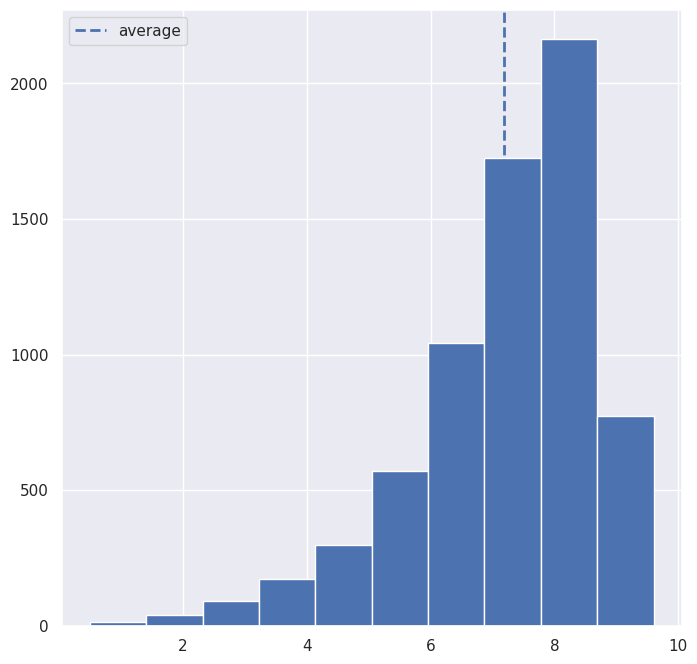

In [225]:
fig, ax = plt.subplots()
pre_plt['user_score'].hist()
avg = pre_plt['user_score'].mean()

ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

**Вывод:**


* Минимальное значение: 0.5
* Максимальное значение: 9.6
* Среднее значение: 7.18

Так, как максимальное и минимальное значение не равноудалены друг от друга, значит, что присутствуют выбивающиеся значения.



### Описательная статистика оценок критиков

In [226]:
numeric_stats = pre_plt['critic_score'].describe()
numeric_stats

count   6,887.00
mean        7.02
std         1.39
min         1.30
25%         6.20
50%         7.20
75%         8.00
max         9.80
Name: critic_score, dtype: float64

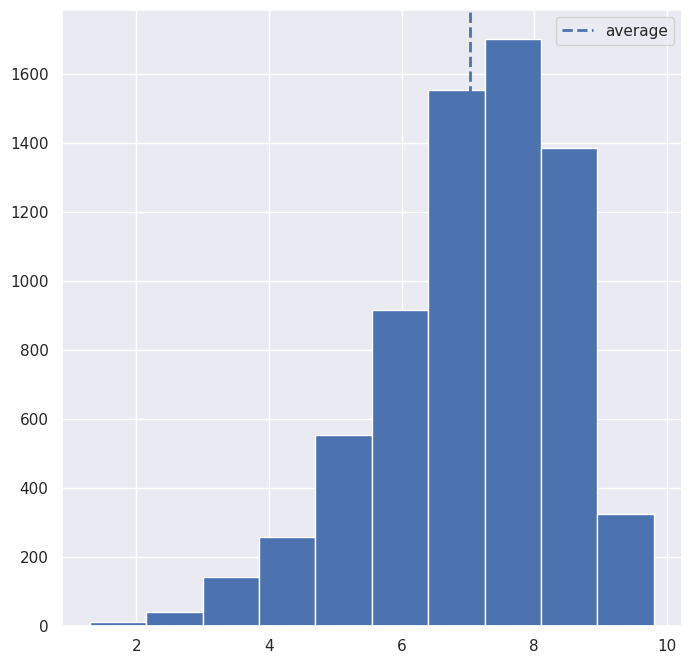

In [227]:
fig, ax = plt.subplots()
pre_plt['critic_score'].hist()
avg = pre_plt['critic_score'].mean()

ax.axvline(x=avg, color='b', label='average', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

**Вывод:**


* Минимальное значение: 1.3
* Максимальное значение: 9.8
* Среднее значение: 7.02

Так, как максимальное и минимальное значение не равноудалены друг от друга, значит, что присутствуют выбивающиеся значения.



###Сравнение выборок оценок пользователей и оценок критиков

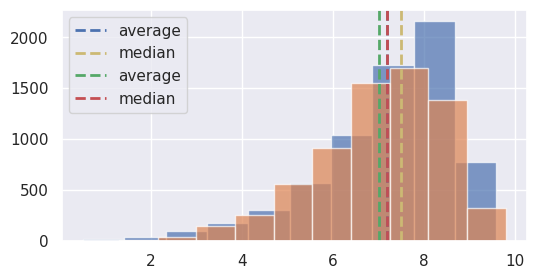

In [228]:
fig, ax = plt.subplots(figsize=(6, 3))

pre_plt['user_score'].hist(alpha=0.7)
avg_visits = pre_plt['user_score'].mean()
median_visits = pre_plt['user_score'].median()

pre_plt['critic_score'].hist(alpha=0.7)
avg_clicks = pre_plt['critic_score'].mean()
median_clicks = pre_plt['critic_score'].median()

ax.axvline(x=avg_visits, color='b', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_visits, color='y', label='median', linestyle='--', linewidth=2)

ax.axvline(x=avg_clicks, color='g', label='average', linestyle='--', linewidth=2)
ax.axvline(x=median_clicks, color='r', label='median', linestyle='--', linewidth=2)

ax.legend().set_visible(True)

## 5.3 Рассчитайте и сравните разброс в пользовательских оценках и оценках критиков для любого выбранного жанра (найдите межквартильный размах). Сделайте выводы.

In [229]:
pre_plt_role = pre_plt[pre_plt['genre'] == 'shooter']
pre_plt_role = pre_plt_role.drop('genre', axis=1)

In [230]:
pre_plt_role['user_score'].quantile(0.75) - pre_plt_role['user_score'].quantile(0.25)


1.799999999999999

In [231]:
pre_plt_role['critic_score'].quantile(0.75) - pre_plt_role['critic_score'].quantile(0.25)

1.7999999999999998

Разброс в оценках пользователей на 0.03 больше чем критиков.

##5.4 Постройте гистограммы частот и «ящики с усами» для числовых переменных  датафрейма. Проанализируйте и сделайте выводы по выбросам для каждого признака (для каждого столбца).

In [232]:
def plots(data, data_label, n_bins):

    a, axes = plt.subplots(1, 2, figsize=(16,4))

    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)

    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)

    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)

    sns.boxplot(data=pre_plt_role, x=data_label, ax=axes[1], linewidth=1)

    plt.show()

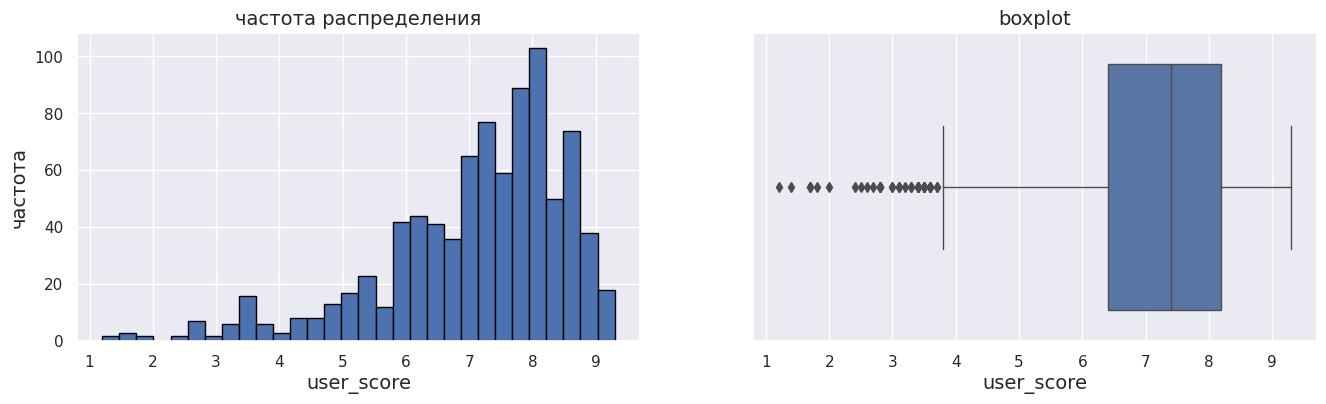

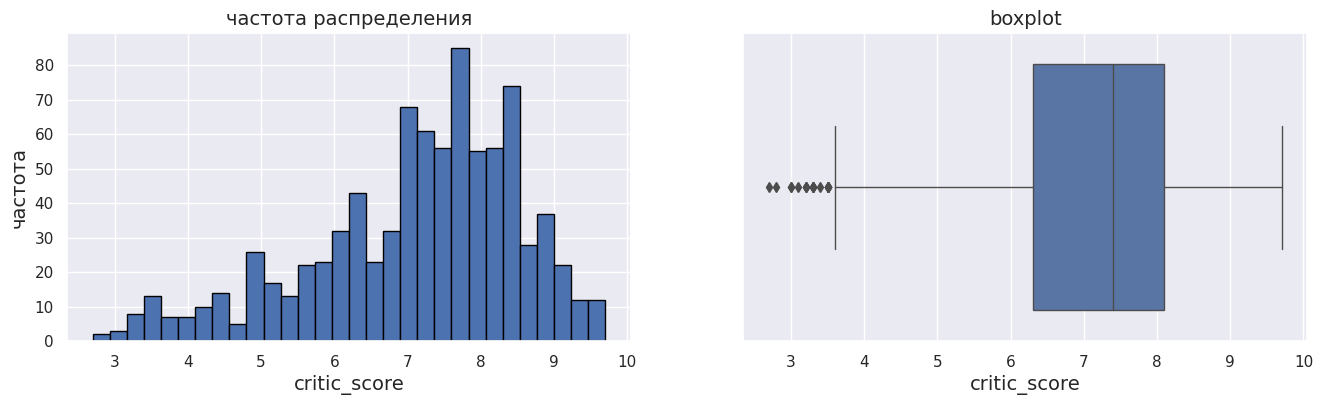

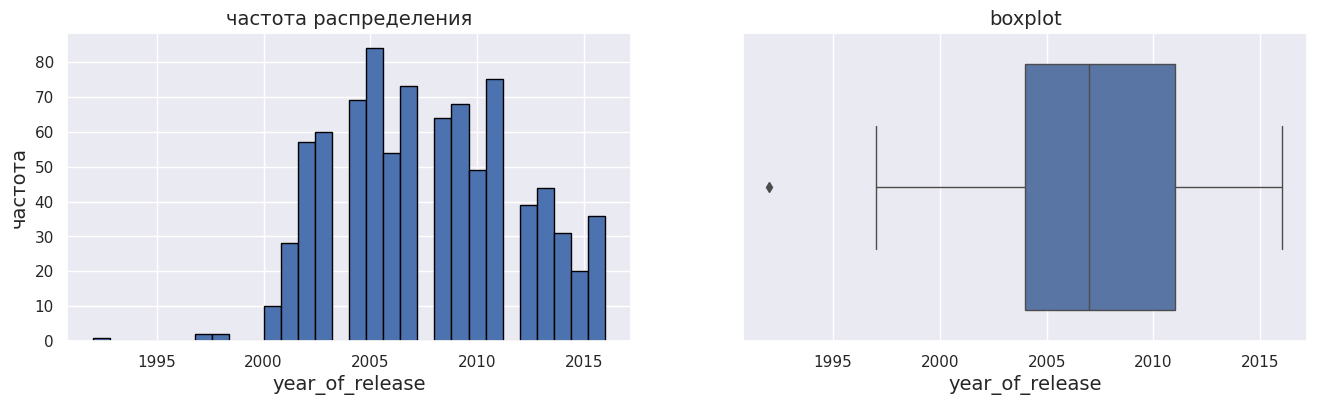

In [233]:
for column in pre_plt_role.columns:

    plots(pre_plt_role[column], column, n_bins=30)

Вычисление границ выбросов для оценок пользователей.

In [234]:
# Вычисление квартилей
q1 = np.percentile(pre_plt_role['user_score'], 25)
q3 = np.percentile(pre_plt_role['user_score'], 75)
# Вычисление межквартильного размаха (IQR)
iqr = q3 - q1
# Вычисление границ выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Нижняя граница выбросов:", lower_bound)
print("Верхняя граница выбросов:", upper_bound)

Нижняя граница выбросов: 3.700000000000002
Верхняя граница выбросов: 10.899999999999999


Вычисление границ выбросов для оценок критиков.

In [235]:
# Вычисление квартилей
q1 = np.percentile(pre_plt_role['critic_score'], 25)
q3 = np.percentile(pre_plt_role['critic_score'], 75)
# Вычисление межквартильного размаха (IQR)
iqr = q3 - q1
# Вычисление границ выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Нижняя граница выбросов:", lower_bound)
print("Верхняя граница выбросов:", upper_bound)

Нижняя граница выбросов: 3.6
Верхняя граница выбросов: 10.799999999999999


Вычисление границ выбросов для годов выпуска.

In [236]:
# Вычисление квартилей
q1 = np.percentile(pre_plt_role['year_of_release'], 25)
q3 = np.percentile(pre_plt_role['year_of_release'], 75)
# Вычисление межквартильного размаха (IQR)
iqr = q3 - q1
# Вычисление границ выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Нижняя граница выбросов:", lower_bound)
print("Верхняя граница выбросов:", upper_bound)

Нижняя граница выбросов: 1993.5
Верхняя граница выбросов: 2021.5


##5.5 Установите, есть ли линейная связь между числовыми признаками. Если есть, то между какими признаками и насколько она сильная.

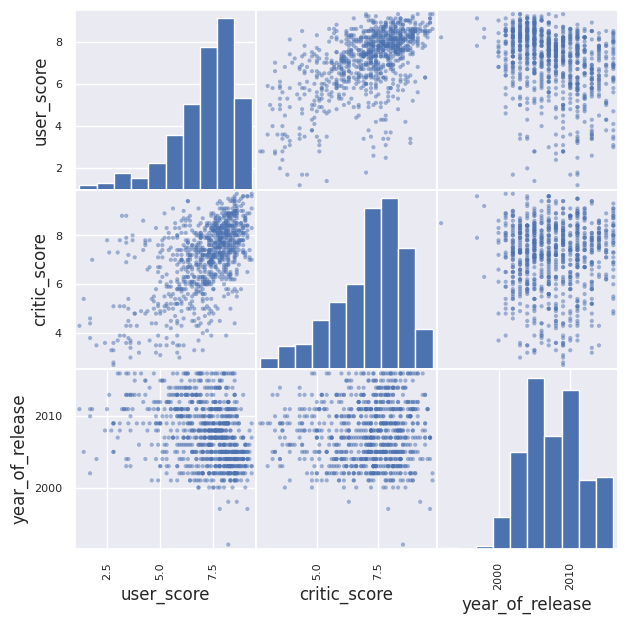

In [237]:
pd.plotting.scatter_matrix(pre_plt_role, figsize=(7, 7))

plt.show()

**Вывод о наличии взаимосвязи между признаками** <br>
* Выявлена связь между 'critic_score' и 'user_score'.

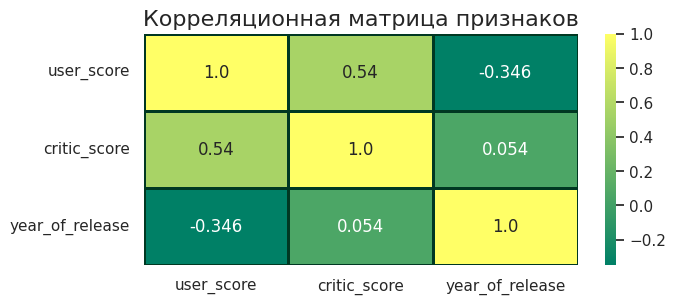

In [238]:
sns.set(rc = {'figure.figsize':(7,3)})

sns.heatmap(pre_plt_role.corr(method='spearman'), annot = True, fmt='.3', cmap= 'summer', linewidths=1, linecolor='#003822')

plt.title('Корреляционная матрица признаков', fontsize=16)

plt.show()

Присутствует слабая положительная корреляционная связь между значениями 'critic_score' и 'user_score'.

# 6 Построение и обучение простейшей модели для задачи регрессии

In [239]:
#объявление глобальных переменных

RANDOM_STATE=12345

In [240]:
def data_stat(data):

    print('Описательные статистики, квартили ряда данных data_games:')
    display(data.describe())
    print()

    sns.set(rc = {'figure.figsize':(8,4)})

    sns.heatmap(
        data.corr(),
        annot = True,
        cmap= 'summer',
        linewidths=1,
        linecolor='#003822'
    )

Описательные статистики, квартили ряда данных data_games:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summa
count,"16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00","16,700.00"
mean,"1,974.17",0.26,0.14,0.08,0.05,2.84,2.69,0.53
std,252.67,0.81,0.50,0.30,0.19,4.06,4.17,1.53
min,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,7.00,7.30,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,9.80,9.70,82.54


<ipython-input-240-cb282af8eebb>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(),


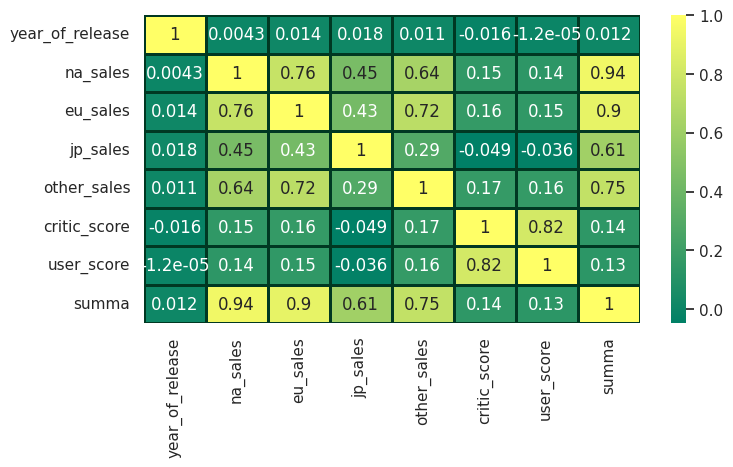

In [241]:
data_stat(data.drop(['name', 'platform', 'genre', 'rating'], axis=1))

###  Отбор и выделение признаков

In [242]:
# отберем признаки с наиболее высокой корреляцией с целевой переменной
# и поместим их в переменную feature

features = data[['year_of_release', 'na_sales', 'eu_sales', 'other_sales', 'jp_sales']]

#Platform, Genre, Rating

In [243]:
# целевую переменную поместим в переменную target

target = data['user_score']

In [244]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [245]:
print(type(target))

<class 'pandas.core.series.Series'>


In [246]:
# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости

features_train, features_test, target_train, target_test = train_test_split(
    features, target,
    test_size=0.3,
    random_state=RANDOM_STATE
)

In [247]:
# посмотрим на новую размерность обучающей выборки

print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')

Признаки обучающей выборки: (11690, 5)
Целевой признак обучающей выборки: (11690,)


In [248]:
# и тестовой выборки

print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')

Признаки тестовой выборки: (5010, 5)
Целевой признак тестовой выборки: (5010,)


###  Обучение модели

In [249]:
# создадим объект этого класса и запишем в переменную model

In [250]:
%%time

model = LinearRegression()

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 19.8 µs


In [251]:
# обучим модель линейной регрессии

In [252]:
%%time

model.fit(features_train, target_train)

CPU times: user 9.55 ms, sys: 0 ns, total: 9.55 ms
Wall time: 46.8 ms


LinearRegression()

In [253]:
# на основе нескольких независимых переменных (feature) предскажем пользовательскую оценку (target)

target_pred = model.predict(features_test)

In [254]:
# выведем первые пять значений с помощью диапазона индексов

print(target_pred[:5])

[3.00576863 2.63785339 2.63064972 2.65021207 2.59812451]


In [255]:
target_test[:5]

3078    -1.00
9805     7.30
9262    -1.00
9851     7.70
13974    7.70
Name: user_score, dtype: float64

In [256]:
coefficient = pd.DataFrame({'features': features.columns, 'coefficient': model.coef_})
coefficient

,features,coefficient
0,year_of_release,-0.00
1,na_sales,0.34
2,eu_sales,0.69
3,other_sales,1.59
4,jp_sales,-1.73


###  Оценка качества модели

In [257]:
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения оценок пользователей

print('Root Mean Sqared Error (RMSE):', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Root Mean Sqared Error (RMSE): 4.045783896638889


In [258]:
# рассчитаем коэффициент детерминации **R2**

print('R2: ', np.round(metrics.r2_score(target_test, target_pred), 2))

R2:  0.05


In [265]:
# Предсказание для игры Atomic Heart
new_game = pd.DataFrame({'year_of_release': [2023], 'na_sales': [5.6], 'eu_sales': [9], 'other_sales': [10], 'jp_sales': [10]})
prediction = model.predict(new_game)

print(f"Predicted Critic Score: {prediction[0]}")

Predicted Critic Score: 9.183149039683302


# 7. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#общий_вывод)

В рамках учебного проекта «Выявление закономерностей, определяющих успешность компьютерных игр» был проанализирован датасет, содержащий исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
В ходе предварительного изучения и предобработки данных:
-	Данные были приведены к единому регистру;
-	Были удалены строки, содержащие в себе информацию, не подлежащую анализу/мешающие анализу остальных строк.;
-	Были заполнены пропуски (недостающие оценки были заполнены цифрой -1, отсутствующие возрастные ограничения были заполнены словами "нет данных";
-	Типы данных в столбцах изменены для оптимизации работы (столбцы с продажами были приведены к типу int, столбец year_of_release был приведен к типу int, столбцы с оценками пользователей и критиков были приведены к типу float (также оценки критиков были приведены к десятибальной системе);
-	Был выполнен поиск дубликатов.


Был проведен **исследовательский анализ** и получены следующие выводы:
-	Оценки пользователей часто совпадают с оценками критиков;
-	Игр жанра action больше всего;
-	Самая продаваемая игра - grand theft auto 5;
-	По мнению пользователей, самая высокооцененная игра - breath of fire III (97);
-	Самая низкооцененная пользователями игра - my little pony: pinkie pie's party (0);
-	Самые высоко оцененные критиками игры soulcalibur, tony hawk's pro skater 2, grand theft auto IV (у всех 9.8)
-	Cамая низкая оценка от критиков: ride to hell (1.3);
-	Наиболее популярны игры с возрастной категорией M;